In [1]:
import sys
import artm
import warnings
import wikipedia
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../src')
sns.set(style="whitegrid")
warnings.simplefilter('ignore')

from preprocessing import *
from itertools import chain
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline as sklearn_pipeline

Using TensorFlow backend.


In [3]:
chars_map = {'\xad': ' ',
             '«': '"', '»': '"', '”': '"', '“': '"', '„': '"', '&ldquo;':'"', '&rdquo;':'"', '&bdquo;':'"',
             '\'': '', '’': '', '‘': '', '`': '', 
             '*': '', '_': '', '©': '' , '[': '', ']': '', '\\':'',
             '––':'-', '&minus;':' - ', '&dash;':' - ',
             '…': '... ', '&hellip;':'... ',
             'тыс.': 'тыс. ', 'кв.': 'кв. ', 'куб.': 'куб. ',
             'прим.': 'прим. ', 'Прим.': 'Прим.', 'зам.': 'зам. ',
             'Теги ФК Динамо Москва Самба Соу //-->':'', '!function(e) (window);':''}


pipeline = sklearn_pipeline([('replace_chars', ReplaceChar(chars_map)),
                             ('sub_code', RegExprSub(r'\{.*\}', ' ')),
                             ('sub_link', RegExprSub(r'https{0,1}://[^ ]*', ' ')),
                             ('sub_twit_link', RegExprSub(r'\({0,1}@[^\(\) ]*\){0,1}', ' ')),
                             ('sub_html', RegExprSub(r'<[^<>]*>', ' ')),
                             ('sub_sym_html', RegExprSub(r'&#{0,1}\w+;', ' ')),
                             ('sub_<a', RegExprSub(r'<a.*', ' ')),
                             ('sub_round_brackets_without_words', RegExprSub(r'\([^a-zA-Zа-яйёА-ЯЙЁ]+\)', ' ')),
                             ('replace_part_lower', ReplacePart(r'[а-яйё"]\.', lambda x: x.replace('.', '. '))),
                             ('replace_part_upper', ReplacePart(r'\.[А-ЯЁЙ"]', lambda x: x.replace('.', '. '))),
                             ('sub_spaces', RegExprSub(r'\s+', ' ')),
                             ('strip', Strip()),
                             ('sent_tokenize', RusSentTokenizer()),
                             ('ner_word_tokenize', RusWordTokenizer_NER()),
                             ('space_detect', SpaceDetecter()),
                             ('joiner_by_char', JoinByChar(chars_set={'-', ',', '.'})),
                             ('morph_predict', MorphPredictor()),
                             ('conllu_encode', CoNLLUFormatEncoder()),
                             ('syntax_parse', SyntaxParser('../models/model_ner_rnn_morth'))])

articles = pd.read_csv('../data/interim/articles_new.csv')[['id', 'title', 'text']]

print('Transform titles')
articles.title = pipeline.fit_transform(articles.title)

print('Transform texts')
articles.text = pipeline.fit_transform(articles.text)

articles.to_csv('../data/interim/articles_preproc.csv', index=False)

2019-09-19 14:49:33.424 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 112: [loading vocabulary from /home/arina/.deeppavlov/models/ner_rus_bert/tag.dict]
I0919 14:49:33.424466 139841586935616 simple_vocab.py:112] [loading vocabulary from /home/arina/.deeppavlov/models/ner_rus_bert/tag.dict]
2019-09-19 14:49:45.558 INFO in 'deeppavlov.core.models.tf_model'['tf_model'] at line 52: [loading model from /home/arina/.deeppavlov/models/ner_rus_bert/model]
I0919 14:49:45.558924 139841586935616 tf_model.py:52] [loading model from /home/arina/.deeppavlov/models/ner_rus_bert/model]


Transform titles
ReplaceChar


100%|██████████| 11127/11127 [00:00<00:00, 184706.68it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 987683.50it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 964615.37it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 539450.50it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 961178.47it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 1010698.64it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 1002319.93it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 1028200.50it/s]


ReplacePart


100%|██████████| 11127/11127 [00:00<00:00, 575108.08it/s]


ReplacePart


100%|██████████| 11127/11127 [00:00<00:00, 1015271.94it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 269996.76it/s]


Strip


100%|██████████| 11127/11127 [00:00<00:00, 1214953.81it/s]


RusSentTokenizer


100%|██████████| 11127/11127 [00:00<00:00, 49151.90it/s]


RusWordTokenizer_NER


100%|██████████| 11127/11127 [04:14<00:00, 43.73it/s]


SpaceDetecter


100%|██████████| 11127/11127 [00:00<00:00, 65542.99it/s]


JoinByChar


100%|██████████| 11127/11127 [00:00<00:00, 80276.21it/s]


MorphPredictor


100%|██████████| 11127/11127 [01:30<00:00, 122.56it/s]


CoNLLUFormatEncoder


100%|██████████| 11127/11127 [00:00<00:00, 50185.25it/s]


SyntaxParser


100%|██████████| 11127/11127 [00:13<00:00, 802.61it/s]


Transform texts
ReplaceChar


100%|██████████| 11127/11127 [00:00<00:00, 65654.84it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 625192.84it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 625595.11it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 65257.88it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 660393.67it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 690497.28it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 628366.28it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 614362.15it/s]


ReplacePart


100%|██████████| 11127/11127 [00:00<00:00, 20021.91it/s]


ReplacePart


100%|██████████| 11127/11127 [00:00<00:00, 481441.96it/s]


RegExprSub


100%|██████████| 11127/11127 [00:00<00:00, 24606.05it/s]


Strip


100%|██████████| 11127/11127 [00:00<00:00, 834704.90it/s]


RusSentTokenizer


100%|██████████| 11127/11127 [00:03<00:00, 3046.42it/s]


RusWordTokenizer_NER


100%|██████████| 11127/11127 [44:47<00:00,  4.14it/s] 


SpaceDetecter


100%|██████████| 11127/11127 [00:03<00:00, 2992.54it/s]


JoinByChar


100%|██████████| 11127/11127 [00:03<00:00, 3311.39it/s]


MorphPredictor


100%|██████████| 11127/11127 [25:40<00:00, 11.02it/s] 


CoNLLUFormatEncoder


100%|██████████| 11127/11127 [00:04<00:00, 2735.83it/s]


SyntaxParser


100%|██████████| 11127/11127 [05:42<00:00, 32.48it/s]


CoNLLUFormatDecoder


100%|██████████| 11127/11127 [00:00<00:00, 35268.95it/s]


CoNLLUFormatDecoder


100%|██████████| 11127/11127 [00:07<00:00, 1511.35it/s]


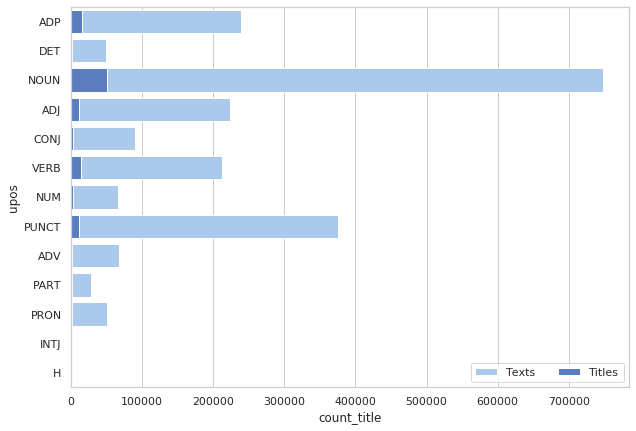

In [11]:
decoder = CoNLLUFormatDecoder()

get_uposes = lambda x: Counter(chain(*[[token.upos for token in sent.tokens] for sent in chain(*x)])).items()

articles = pd.read_csv('../data/interim/articles_preproc.csv')

uposes_title = pd.DataFrame(get_uposes(decoder.transform(articles.title)), columns=['upos', 'count'])
uposes_text = pd.DataFrame(get_uposes(decoder.transform(articles.text)), columns=['upos', 'count'])

uposes = pd.merge(uposes_title, uposes_text, on='upos', suffixes=('_title', '_text'))

figure, ax = plt.subplots(figsize=(10, 7))

sns.set_color_codes('pastel')
sns.barplot(x='count_text', y='upos', data=uposes, label='Texts', color='b')

sns.set_color_codes('muted')
sns.barplot(x='count_title', y='upos', data=uposes, label='Titles', color='b')

ax.legend(ncol=2, loc='lower right', frameon=True)

In [2]:
upos_set = {'NOUN', 'VERB', 'ADJ', 'ADV'}

articles = pd.read_csv('../data/interim/articles_preproc.csv')

decoder = CoNLLUFormatDecoder()

articles.title = decoder.transform(articles.title)
articles.text = decoder.transform(articles.text)

articles['title_vw'] = VowpalWabbitFormatEncoder(suffix='title_', upos_filt=True, upos_set=upos_set).transform(articles.title)
articles['text_vw'] = VowpalWabbitFormatEncoder(suffix='text_', upos_filt=True, upos_set=upos_set).transform(articles.text)

with open('../data/interim/articles_vw.txt', 'w') as fl:
    fl.write('\n'.join(articles[['id', 'title_vw', 'text_vw']].apply(lambda x: f'{x.id} {x.title_vw} {x.text_vw}', axis=1))+'\n')
    
artm.BatchVectorizer(data_path='../data/interim/articles_vw.txt', data_format='vowpal_wabbit', target_folder='../data/interim/batches')

articles.title = Join_NER().transform(articles.title)
articles.text = Join_NER().transform(articles.text)

articles['title_vw_split_ner'] = VowpalWabbitFormatEncoder(suffix='title_', upos_filt=True, upos_set=upos_set, split_ner=True).transform(articles.title)
articles['text_vw_split_ner'] = VowpalWabbitFormatEncoder(suffix='text_', upos_filt=True, upos_set=upos_set, split_ner=True).transform(articles.text)

with open('../data/interim/articles_vw_split_ner.txt', 'w') as fl:
    fl.write('\n'.join(articles[['id', 'title_vw_split_ner', 'text_vw_split_ner']].apply(lambda x: f'{x.id} {x.title_vw_split_ner} {x.text_vw_split_ner}', axis=1))+'\n')
    
artm.BatchVectorizer(data_path='../data/interim/articles_vw_split_ner.txt', data_format='vowpal_wabbit', target_folder='../data/interim/batches_split_ner')

articles.drop(['title', 'text'], axis=1).to_csv('../data/interim/articles_vw.csv', index=False)

CoNLLUFormatDecoder


100%|██████████| 11127/11127 [00:00<00:00, 26872.49it/s]


CoNLLUFormatDecoder


100%|██████████| 11127/11127 [00:07<00:00, 1495.41it/s]


VowpalWabbitFormatEncoder


100%|██████████| 11127/11127 [00:00<00:00, 113870.42it/s]


VowpalWabbitFormatEncoder


100%|██████████| 11127/11127 [00:00<00:00, 14834.42it/s]


Join_NER


100%|██████████| 11127/11127 [00:00<00:00, 53282.36it/s]


Join_NER


100%|██████████| 11127/11127 [00:04<00:00, 2516.72it/s]


VowpalWabbitFormatEncoder


100%|██████████| 11127/11127 [00:00<00:00, 57886.73it/s]


VowpalWabbitFormatEncoder


100%|██████████| 11127/11127 [00:01<00:00, 10835.44it/s]
